In [1]:
# data_analysis.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv("../data/indian_liver_patient.csv")  # Adjust path if necessary
data.head()


Matplotlib is building the font cache; this may take a moment.


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [2]:
# Display data information
data.info()

# Check for missing values
data.isnull().sum()

# Describe numerical columns
data.describe()

# Check unique values in categorical columns
print("Unique values in 'Gender':", data['Gender'].unique())
print("Unique values in 'Dataset':", data['Dataset'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
Unique values in 'Gender': ['Female' 'Male']
Unique values in 'Dataset': [1 2]


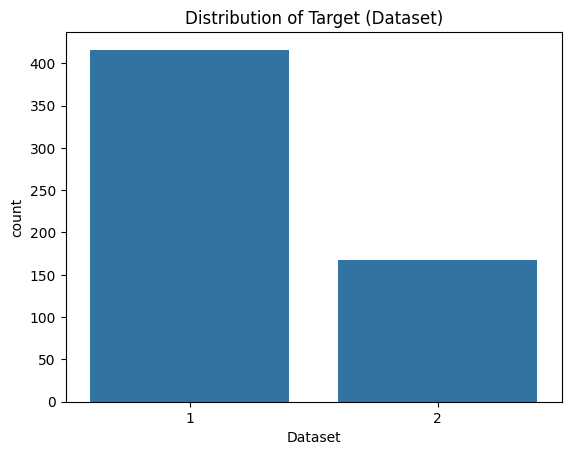

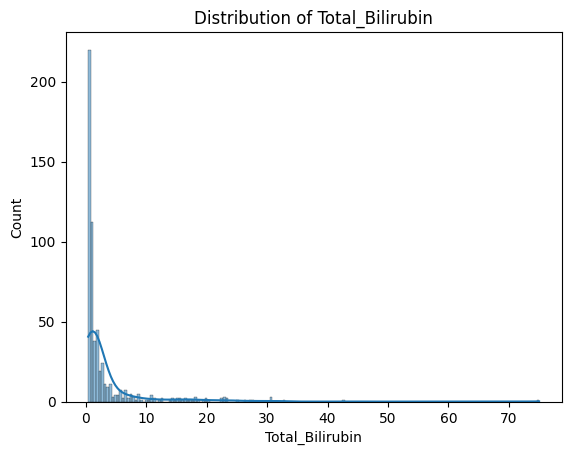

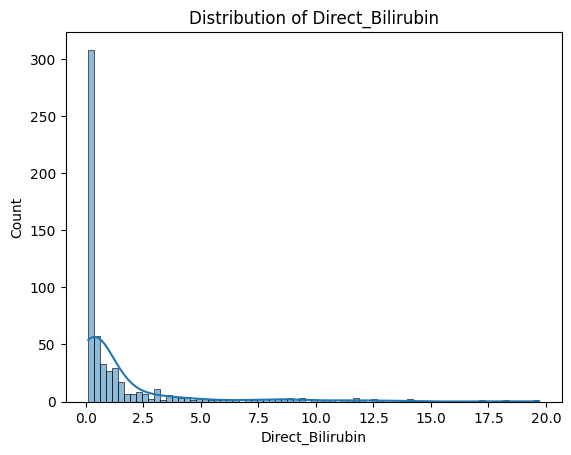

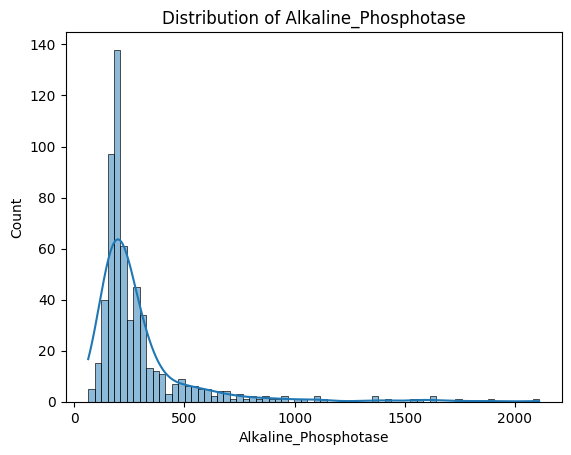

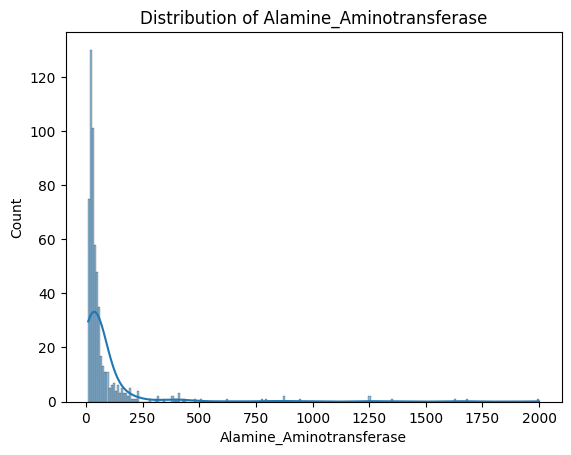

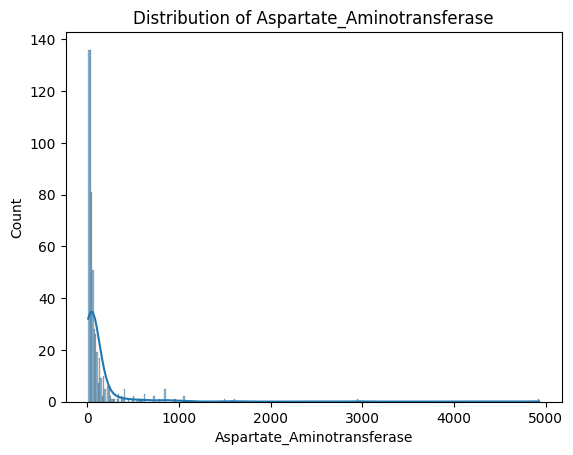

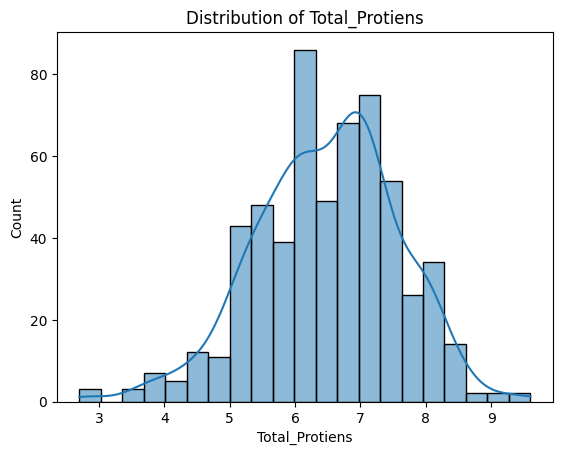

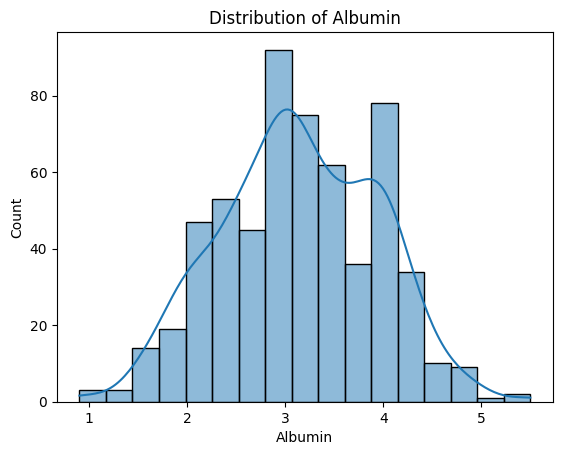

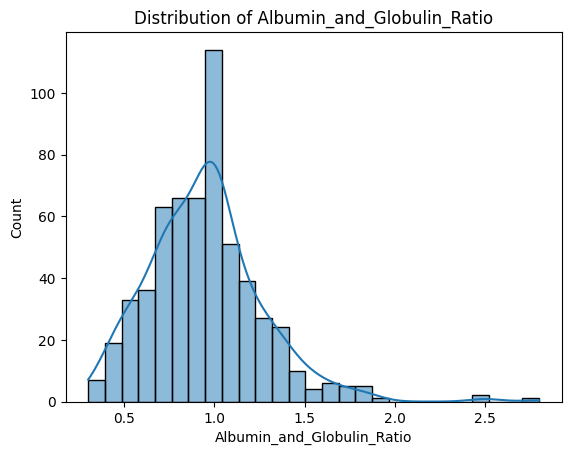

In [3]:
# Visualize the distribution of the target variable
sns.countplot(x='Dataset', data=data)
plt.title("Distribution of Target (Dataset)")
plt.show()

# Visualize numerical features
numerical_features = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 
                      'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 
                      'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']

for feature in numerical_features:
    plt.figure()
    sns.histplot(data[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()


In [5]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # 1 = Male, 0 = Female

# Drop rows with missing values, if any
data = data.dropna()

# Define features and target
X = data.drop('Dataset', axis=1)  # Assuming 'Dataset' is the target
y = data['Dataset']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6120689655172413
Confusion Matrix:
 [[57 16]
 [29 14]]
Classification Report:
               precision    recall  f1-score   support

           1       0.66      0.78      0.72        73
           2       0.47      0.33      0.38        43

    accuracy                           0.61       116
   macro avg       0.56      0.55      0.55       116
weighted avg       0.59      0.61      0.59       116



In [7]:
import pickle
import os

# Ensure the models directory exists
os.makedirs("../models", exist_ok=True)

# Save the model and scaler
with open("../models/knn_model.pkl", "wb") as model_file:
    pickle.dump(knn, model_file)

with open("../models/scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)
